Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

## Training Data

In [3]:
train_data = pd.read_excel("flight_train.xlsx")

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Here, we see that most of the Columns are of 'object' data type i.e, they are basically 'Categorical' in nature. Besides that only one 'Column' of 'int' type and that is 'PRICE'.

And from the problem statement it is also very clear that 'Price' is our Dependent Variable / Label and others are Independents / Features

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We can see that there are two columns with 1 missing values each in - 'Route' and 'Total_Stops' . So, we should drop these Missing Values

In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now, we can see there is no missing values in the Dataset .

In [9]:
train_data.shape

(10682, 11)

### EDA

First, we deal with the column 'Date_of_Journey' as it an 'object' datatype.

In [10]:
train_data['Journey_Date'] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data['Journey_Month'] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.month
train_data['Journey_Year'] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.year

In [11]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [12]:
train_data.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
Journey_Date         10
Journey_Month         4
Journey_Year          1
dtype: int64

We can see that the Unique values in 'Journey_Year' is only that means this data is only for the Year 2019. So, we don't need this 
extra column.

Besides that the column 'Date_of_Journey' is also now have no meaning for our Dataset.

So, we should DROP both these Columns.

In [13]:
train_data.drop(['Date_of_Journey', 'Journey_Year'], axis=1, inplace=True) 

In [14]:
train_data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


Secondly, we deal with the column 'Dep_Time' as it an 'object' datatype.

And we deal with it the same way as we have dealt with the 'Date_of_Journey' column.

In [15]:
train_data['Dep_Hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_Min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

As, we have dropped the 'Date-of_Journey' column after extraction of Date amd Month. Similarly, now we can drop 'Dep_Time' 

In [16]:
train_data.drop(['Dep_Time'], axis=1 , inplace=True)

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


Now, the way we have treated 'Date_of_Journey' and 'Dep_Time', same way we have to treat "Arrival_Time" 

In [18]:
train_data['Arrival_Hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_Min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [19]:
train_data.drop(['Arrival_Time'], axis=1, inplace=True)

Now is the time to treat 'Duration'

Here, we are trying to convert 'Duration' into a List

In [20]:
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   # It extract Hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # It extract Minutes from duration

Adding duration_hours and duration_mins list in the train_data Dataframe

In [21]:
train_data['Duration_Hrs'] = duration_hours
train_data['Duration_Mins'] = duration_mins

Now we are able to Drop the column 'Duration' in the same manner as we have dropped the Date_of_Journey', 'Dep_Time' and 'Arrival_Time'

In [22]:
train_data.drop(['Duration'], axis=1, inplace=True)

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hrs,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


#### Dealing with Categorical Data

In [24]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

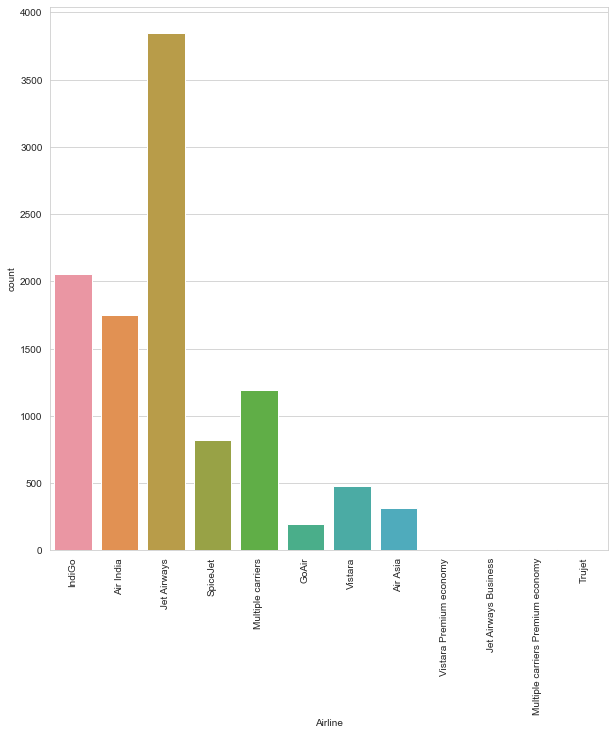

In [25]:
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.countplot(x="Airline", data=train_data)
plt.xticks(rotation=90);

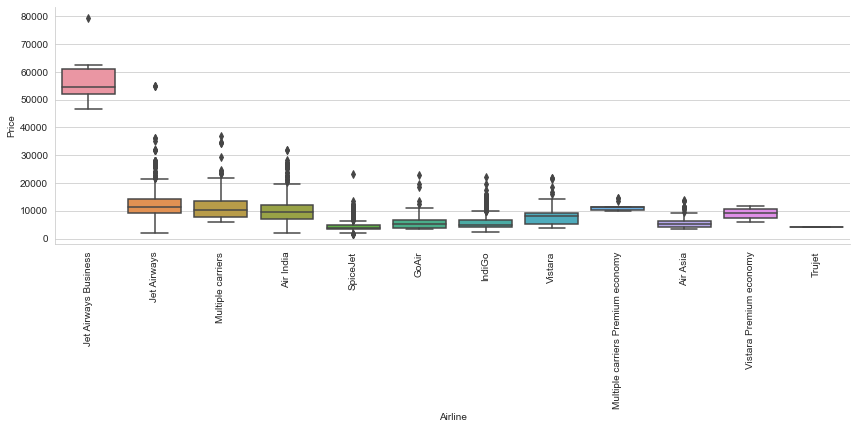

In [26]:
# Airline vs.Price plot

sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending=False), kind="box", height=4, aspect=3)
plt.xticks(rotation=90);
plt.show()

Here we are witnessing that the highest price is of Jet Airways Business and all the other Carriers have more or less similar pricing.

In [27]:
# Applying OneHotEncodeing on the column 'Airline' as it is a Nominal Categorical Data

Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)

In [28]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [29]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

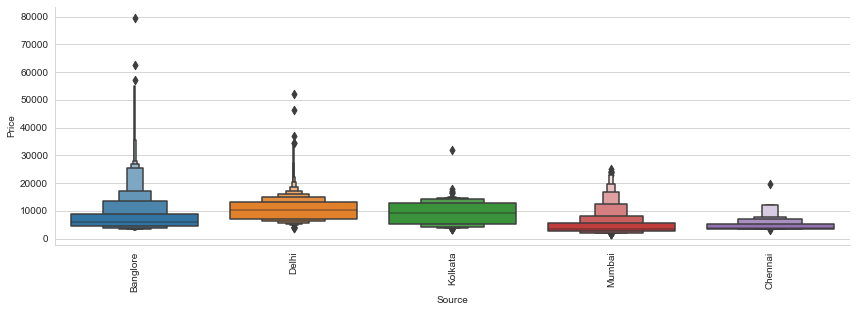

In [30]:
# Source vs.Price plot

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending=False), kind="boxen", height=4, aspect=3)
plt.xticks(rotation=90);
plt.show()

In [31]:
# Applying OneHotEncodeing on the column 'Source' as it is also a Nominal Categorical Data

Source = train_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True)

In [32]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [33]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [34]:
# Applying OneHotEncodeing on the column 'Destination' as it is also a Nominal Categorical Data

Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)

In [35]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [36]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

#### Dropping Some Colums

In [37]:
train_data.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [38]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

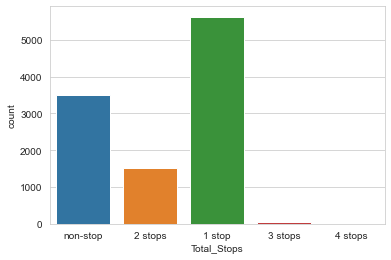

In [39]:
#plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.countplot(x="Total_Stops", data=train_data);

We have to convert this Categorical Data also in some Numerical form so that we can perform some kind operations on it.

In [40]:
train_data.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

In [41]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hrs,Duration_Mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


Now we concatenate all the Dataframes which we have just made above with the existing 'train_data' and for that we make a new Dataframe called 'trained_data'.

In [42]:
trained_data = pd.concat([Airline, Source, Destination, train_data], axis=1)

In [43]:
trained_data.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hrs,Duration_Mins
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


 After doing all this, now we don't need the Columns 'Airline','Source', 'Destination' because we have alredy dealt with it. So, it is better to DROP these columns.

In [44]:
trained_data.drop(['Airline','Source','Destination'], axis=1, inplace=True)

In [45]:
trained_data.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops,Price,Journey_Date,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hrs,Duration_Mins
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,13882,9,6,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13302,1,3,16,50,21,35,4,45


In [46]:
trained_data.shape

(10682, 30)

## Testing Data

In [49]:
test_data = pd.read_excel("flight_test.xlsx")

In [50]:
test_data.shape

(2671, 10)

In [51]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


So, we can observe that besides the 'Price' column all the Features are present here.

Here we have to do all the steps for Testing Data which we have done before for the Training Data.

In [52]:
# Preprocessing

print("Test Data Info")
print("-" *20)
print(test_data.info())

print("*"*75)
print()

print("Null Values")
print("-" *20)
test_data.dropna(inplace=True)
print(test_data.isnull().sum())

print("*"*75)
print()

# EDA

# Date_of_Journey

test_data['Journey_Date'] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data['Journey_Month'] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.month
test_data['Journey_Year'] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.year
test_data.drop(['Date_of_Journey', 'Journey_Year'], axis=1, inplace=True)

# Dep_Time

test_data['Dep_Hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_Min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop(['Dep_Time'], axis=1 , inplace=True)

# Arrival_Time

test_data['Arrival_Hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_Min'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop(['Arrival_Time'], axis=1, inplace=True)

# Duration in 'duration_hours' and 'duration_mins'

duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   # It extract Hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # It extract Minutes from duration
    
test_data['Duration_Hrs'] = duration_hours
test_data['Duration_Mins'] = duration_mins
test_data.drop(['Duration'], axis=1, inplace=True)

# Applying OneHotEncodeing on the column 'Airline' as it is a Nominal Categorical Data

Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)

# Applying OneHotEncodeing on the column 'Source' as it is also a Nominal Categorical Data

Source = test_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True)

# Applying OneHotEncodeing on the column 'Destination' as it is also a Nominal Categorical Data

Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)

# Dropping some Columns

test_data.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

# Replacing the Categorical Values 

test_data.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

# Concatinating differnt Dataframes with test_data

tested_data = pd.concat([Airline, Source, Destination, test_data], axis=1)

# Dropping some Columns

tested_data.drop(['Airline','Source','Destination'], axis=1, inplace=True)


print("Shape of the Data")

tested_data.shape

Test Data Info
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
***************************************************************************

Null Values
--------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration    

(2671, 28)

In [53]:
tested_data.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops,Journey_Date,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hrs,Duration_Mins
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,6,6,17,30,4,25,10,55
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,12,5,6,20,10,20,4,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,21,5,19,15,19,0,23,45
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,21,5,8,0,21,0,13,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,24,6,23,55,2,45,2,50


### Feature Selection

In [54]:
trained_data.shape

(10682, 30)

In [55]:
trained_data.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops,Price,Journey_Date,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hrs,Duration_Mins
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,13882,9,6,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13302,1,3,16,50,21,35,4,45


In [56]:
# Dropping the column 'Price'
X = trained_data.drop(['Price'], axis=1)

In [57]:
#X = trained_data.loc[:, x[:]]
X.shape

(10682, 29)

In [58]:
X.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops,Journey_Date,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hrs,Duration_Mins
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,9,6,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,16,50,21,35,4,45


In [59]:
X.isnull().sum()

Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Destination_Cochin                           0
Destination_Delhi                            0
Destination_Hyderabad                        0
Destination_Kolkata                          0
Destination_New Delhi                        0
Total_Stops                                  0
Journey_Date 

In [60]:
Y = trained_data['Price']

In [61]:
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

It looks good through the use of HeatMap

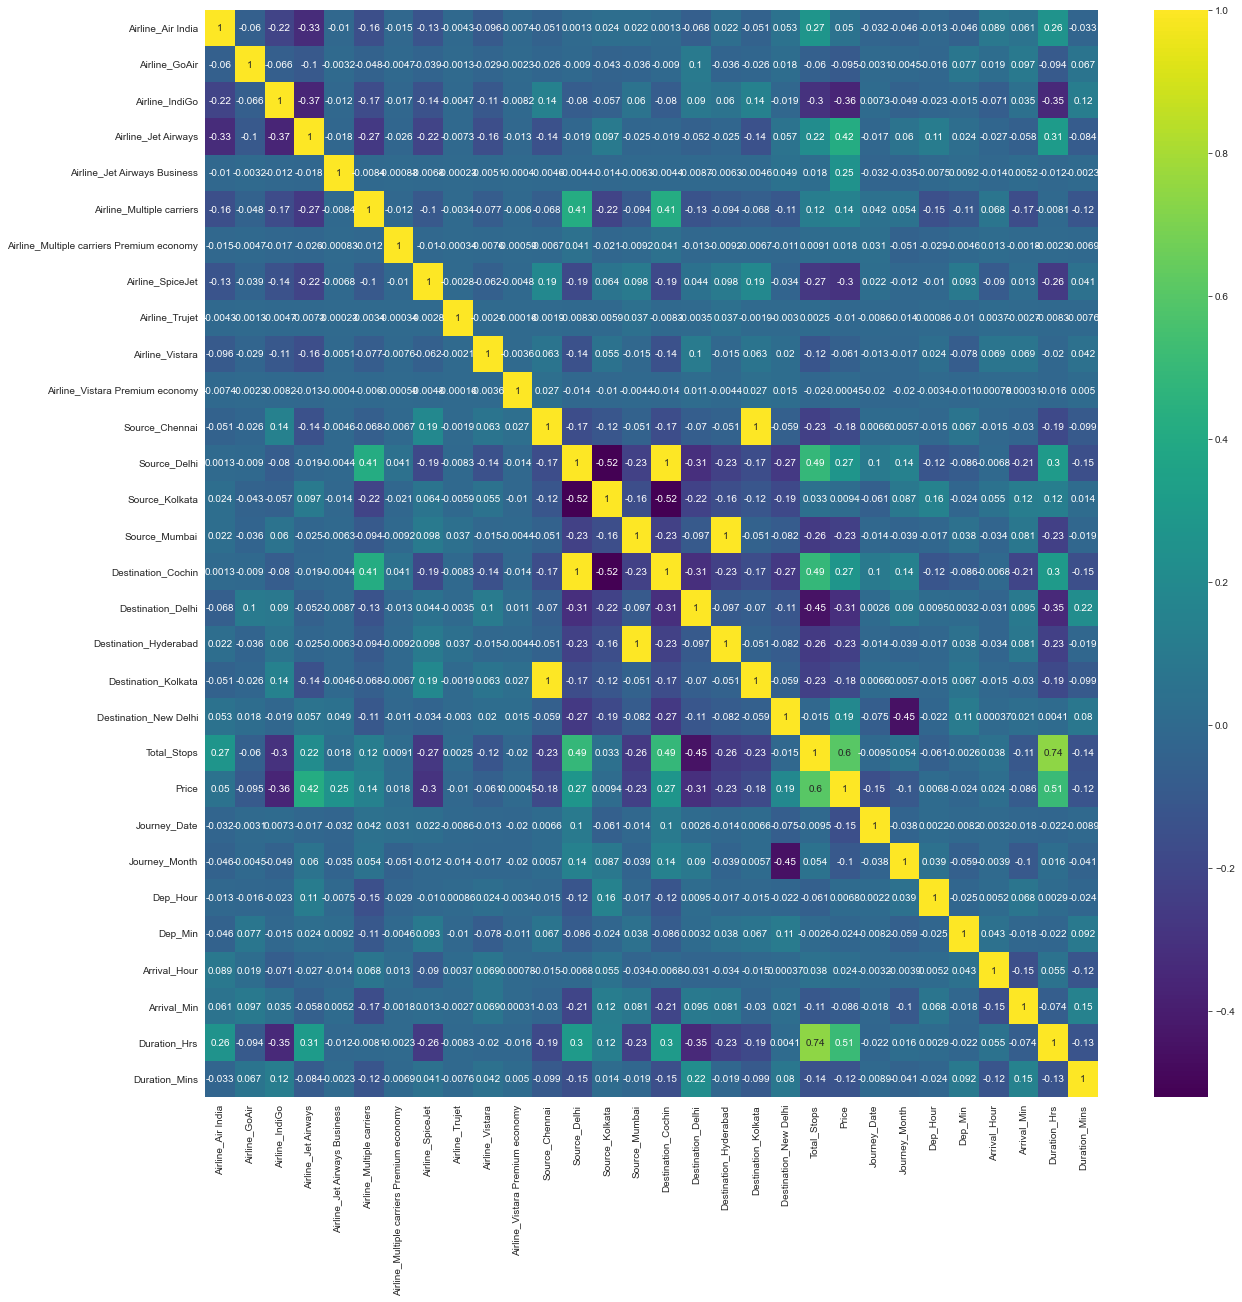

In [64]:
plt.figure(figsize=(20,20))
sns.heatmap(trained_data.corr(), annot=True, cmap='viridis')
plt.show()

In [63]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor()

In [65]:
print(selection.feature_importances_)

[8.82843036e-03 1.69569597e-03 1.58570638e-02 1.34170269e-01
 6.67943797e-02 2.05335544e-02 8.71933680e-04 2.61265503e-03
 8.92310191e-05 5.12978096e-03 7.97813544e-05 5.28428614e-04
 6.10150391e-03 3.49574679e-03 6.05661908e-03 7.18257086e-03
 1.20513337e-02 6.51970576e-03 3.92433346e-04 2.49712922e-02
 2.47509474e-01 1.42937710e-01 5.31928393e-02 2.38162206e-02
 2.17607629e-02 2.85227629e-02 1.92383757e-02 1.21964293e-01
 1.70951521e-02]


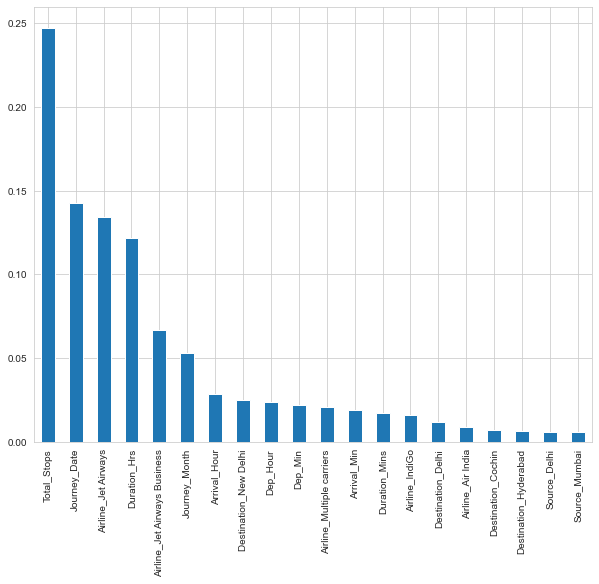

In [67]:
plt.figure(figsize=(10,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='bar')
plt.show()

#### Modelling the Data

Using Random Forest 

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=100 )

In [69]:
from sklearn.ensemble import RandomForestRegressor
reg_rfr = RandomForestRegressor()
reg_rfr.fit(X_train, Y_train)

RandomForestRegressor()

In [70]:
Y_pred = reg_rfr.predict(X_test)

In [72]:
reg_rfr.score(X_train, Y_train)

0.953840047250268

In [73]:
reg_rfr.score(X_test, Y_test)

0.8244632919843354

In [74]:
from sklearn import metrics

In [75]:
print('MAE : ', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE : ', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE :  1183.822452531505
MSE :  3803922.216786989
RMSE :  1950.3646368787015


In [76]:
metrics.r2_score(Y_test, Y_pred)

0.8244632919843354

In [80]:
# Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV


In [82]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=10)]

max_features = ['auto','sqrt']

max_depth = [int(x) for x in np.linspace(5,30, num=6)]

min_samples_split = [2,5,10,15,100]

min_samples_leaf = [1,2,5,10]

In [83]:
# Random Grid

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}

In [84]:
rf_random = RandomizedSearchCV(estimator = reg_rfr, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=55, n_jobs=1)

In [85]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=222; total time=   4.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=222; total time=   3.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=222; total time=   4.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=222; total time=   3.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=222; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=833; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=833

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 222, 344, 466,
                                                         588, 711, 833, 955,
                                                         1077, 1200]},
                   random_state=55, scoring='neg_mean_squared_error',
                   verbose=2)

In [86]:
rf_random.best_params_

{'n_estimators': 222,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [87]:
prediction = rf_random.predict(X_test)

C:\Users\Shekhar Sinha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


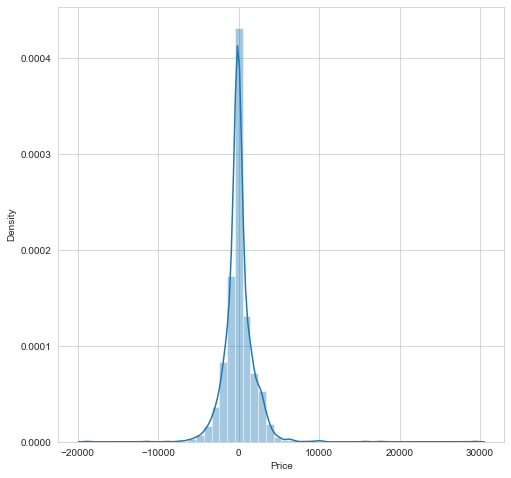

In [88]:
plt.figure(figsize=(8,8))
sns.distplot(Y_test-prediction)
plt.show()

The plot looks like a Normal Distribution

### Saving the Model for Reuse

In [96]:
import pickle
file = open('flight_rf.pkl','wb')

pickle.dump(rf_random, file)

In [97]:
model = open('flight_rf.pkl', 'rb')
forest = pickle.load(model)

In [98]:
y_pred = forest.predict(X_test)

In [99]:
metrics.r2_score(Y_test, y_pred)

0.8390265480091529